<b>IMPORTING MODULES</b>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
warnings.filterwarnings('ignore')

<b>IMPORT DATASET FILE</b>

In [3]:
df=pd.read_csv('add.csv',low_memory=False,header=0)

print ("Dataset Length: ", len(df))
print ("Dataset Shape: ", df.shape)
print(df.head())


Dataset Length:  3279
Dataset Shape:  (3279, 1560)
   Unnamed: 0    0    1       2  3  4  5  6  7  8  ...  1549  1550  1551  \
0           0  125  125       1  1  0  0  0  0  0  ...     0     0     0   
1           1   57  468  8.2105  1  0  0  0  0  0  ...     0     0     0   
2           2   33  230  6.9696  1  0  0  0  0  0  ...     0     0     0   
3           3   60  468     7.8  1  0  0  0  0  0  ...     0     0     0   
4           4   60  468     7.8  1  0  0  0  0  0  ...     0     0     0   

   1552  1553  1554  1555  1556  1557  1558  
0     0     0     0     0     0     0   ad.  
1     0     0     0     0     0     0   ad.  
2     0     0     0     0     0     0   ad.  
3     0     0     0     0     0     0   ad.  
4     0     0     0     0     0     0   ad.  

[5 rows x 1560 columns]


In [4]:
df=df.drop('Unnamed: 0',axis=1)
df.columns=df.columns.astype('int')



In [5]:
print(df.head())
print(df.info())

  0    1       2    3     4     5     6     7     8     9     ...  1549  1550  \
0  125  125       1    1     0     0     0     0     0     0  ...     0     0   
1   57  468  8.2105    1     0     0     0     0     0     0  ...     0     0   
2   33  230  6.9696    1     0     0     0     0     0     0  ...     0     0   
3   60  468     7.8    1     0     0     0     0     0     0  ...     0     0   
4   60  468     7.8    1     0     0     0     0     0     0  ...     0     0   

   1551  1552  1553  1554  1555  1556  1557  1558  
0     0     0     0     0     0     0     0   ad.  
1     0     0     0     0     0     0     0   ad.  
2     0     0     0     0     0     0     0   ad.  
3     0     0     0     0     0     0     0   ad.  
4     0     0     0     0     0     0     0   ad.  

[5 rows x 1559 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


<b> DEALING WITH MISSING VALUES</b>

In [6]:
def count_missing(df):
    newdf=df.iloc[:,[0,1,2,3]]
    newdf=newdf.applymap(lambda x:'?' in x)
    plt.figure(figsize=(17,5))
    plt.title("Missing values HeatMap")
    print(sns.heatmap(newdf,cbar=False,yticklabels=False,cmap='viridis'))
    for i in (newdf):
        print('column['+str(i)+'] has missing values -'+str(sum(newdf[i])))

AxesSubplot(0.125,0.125;0.775x0.755)
column[0] has missing values -903
column[1] has missing values -901
column[2] has missing values -910
column[3] has missing values -15


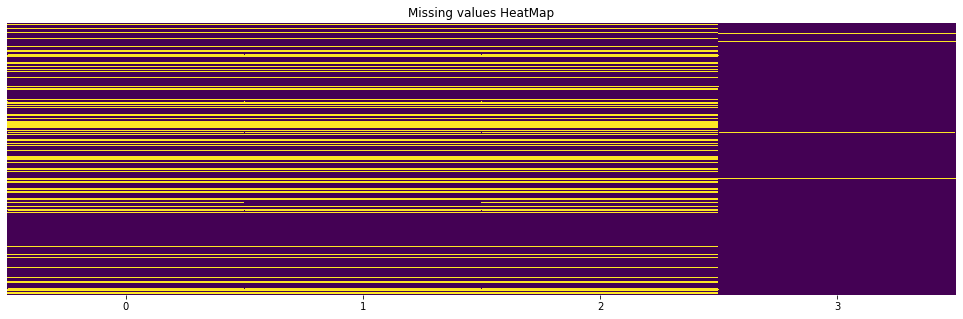

In [7]:
 count_missing(df)

In [8]:

def replace_missing(df):
    for i in df:
        df[i]=df[i].replace('[?]',np.NAN,regex=True).astype('float')
        df[i]=df[i].fillna(df[i].mean())
    return df

In [9]:
df[[0,1,2,3]]=replace_missing(df.iloc[:,[0,1,2,3]].copy()).values

In [11]:
df[3]=df[3].apply(lambda x:round(x))

<b>EXPLORATORY DATA ANALYSIS</b>

In [12]:
df[[0,1,2,3]].describe()

,0,1,2,3
count,3279.000000,3279.000000,3279.000000,3279.000000
mean,64.021886,155.344828,3.911953,0.768222
std,46.703695,110.729038,5.136153,0.422032
min,1.000000,1.000000,0.001500,0.000000
25%,32.500000,90.000000,1.279400,1.000000
50%,64.021886,150.000000,3.911953,1.000000
75%,64.021886,155.344828,3.911953,1.000000
max,640.000000,640.000000,60.000000,1.000000


<b>OUTLIERS IN THE DATASET</b>

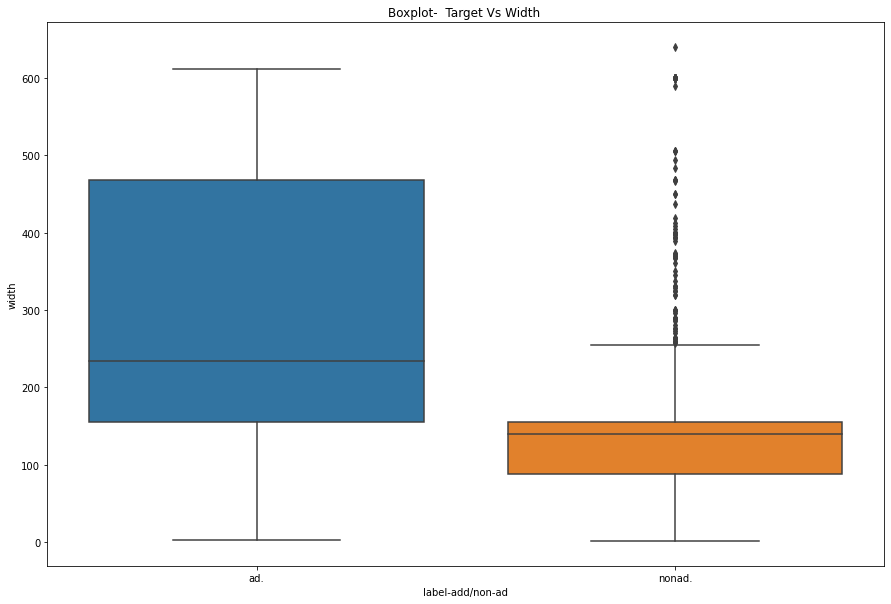

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=1,data=df)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot-  Target Vs Width ")
plt.show()

<b> FEATURE SCALING</b>

In [14]:
sc = StandardScaler()
# Factorization 
df.loc[df[1558] == 'ad.', 1558] = '1'
df.loc[df[1558] == 'nonad.', 1558] = '0'
x = df.iloc[:,:-1]
x = pd.DataFrame(sc.fit_transform(x), index=x.index, columns=x.columns)
y = df.iloc[:, -1]

In [15]:
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: 1558, dtype: object

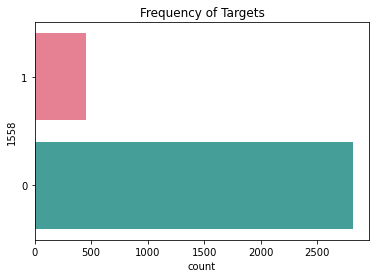

In [16]:
sns.countplot(data=df,y=1558,palette='husl')
plt.title("Frequency of Targets")
plt.show()


<b> SPLITTING THE DATA</b>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


<b>PRINCIPLE COMPONENT ANALYSIS (PCA)</b>

Text(0, 0.5, 'cumulative explained variance')

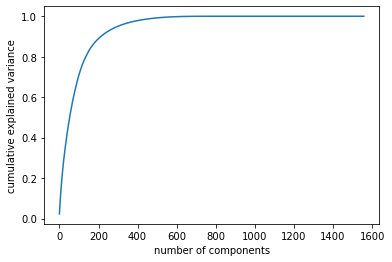

In [18]:
pca=PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [19]:
n_components = 400;
pca = PCA(n_components=n_components)
PCA(copy=True, iterated_power='auto', n_components=n_components, random_state=None, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=400)

In [20]:
pca.fit(X_train)


PCA(n_components=400)

In [21]:
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)


<b>LOGISTIC REGRESSION</b>

In [23]:
clf_lr=LogisticRegression()
clf_lr.fit(X_train_PCA,y_train)
pred = clf_lr.predict(X_test_PCA)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
acc_lr=(accuracy_score(y_test,pred)*100)
print(acc_lr)


[[836  13]
 [ 19 116]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       849
           1       0.90      0.86      0.88       135

    accuracy                           0.97       984
   macro avg       0.94      0.92      0.93       984
weighted avg       0.97      0.97      0.97       984

96.7479674796748


<b>DECISION TREE</b>

In [24]:
    clf_entropy = DecisionTreeClassifier(

    criterion = "entropy", random_state = 100,
    max_depth = 4, min_samples_leaf = 2)


    clf_entropy.fit(X_train_PCA, y_train)
    
    pred2 = clf_entropy.predict(X_test_PCA)
    print(confusion_matrix(y_test, pred2))
    print(classification_report(y_test, pred2))
    acc_dt=(accuracy_score(y_test,pred2)*100)
    print(acc_dt)

[[831  18]
 [ 26 109]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       849
           1       0.86      0.81      0.83       135

    accuracy                           0.96       984
   macro avg       0.91      0.89      0.90       984
weighted avg       0.95      0.96      0.95       984

95.52845528455285


<b> SVM(GridSearchCV)</b>

In [26]:
params={'C':(0.001,0.005,0.01,0.5,0.1,1)}
clf_l=svm.SVC(kernel='linear')
svm_grid_lin=GridSearchCV(clf_l,params,n_jobs=-1,cv=10,verbose=1,scoring='accuracy')
svm_grid_lin.fit(X_train_PCA,y_train)

linsvm_clf=svm_grid_lin.best_estimator_
acc_svml=(accuracy_score(y_test,linsvm_clf.predict(X_test_PCA)))*100
print(acc_svml)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   18.3s finished


96.64634146341463


In [27]:
svm_grid_lin.best_params_

{'C': 0.005}

In [28]:
params={'C':(0.001,0.005,0.01,0.5,0.1,1)}
clf_p=svm.SVC(kernel='poly',degree=2)
svm_grid_pol=GridSearchCV(clf_p,params,n_jobs=-1,cv=10,verbose=1,scoring='accuracy')
svm_grid_pol.fit(X_train_PCA,y_train)

polsvm_clf=svm_grid_pol.best_estimator_
acc_svmp=(accuracy_score(y_test,polsvm_clf.predict(X_test_PCA)))*100
print(acc_svmp)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   36.0s finished


93.90243902439023


In [29]:
svm_grid_pol.best_params_

{'C': 1}

In [30]:
params={'C':(0.001,0.005,0.01,0.5,0.1,1),'gamma':(0.001,0.01,0.1,0.5,1)}
clf_r=svm.SVC(kernel='rbf')
svm_grid_rad=GridSearchCV(clf_r,params,n_jobs=-1,cv=10,verbose=1,scoring='accuracy')
svm_grid_rad.fit(X_train_PCA,y_train)

radsvm_clf=svm_grid_rad.best_estimator_
acc_svmr=(accuracy_score(y_test,radsvm_clf.predict(X_test_PCA)))*100
print(acc_svmr)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.3min finished


95.73170731707317


In [31]:
svm_grid_rad.best_params_

{'C': 1, 'gamma': 0.001}

<b>COMPARISON CHART</b>

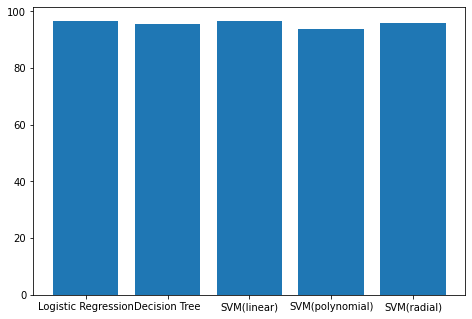

In [35]:
figure=plt.figure()
ax=figure.add_axes([0,0,1,1])
models=['Logistic Regression','Decision Tree','SVM(linear)','SVM(polynomial)','SVM(radial)']
accuracy_rate=[acc_lr,acc_dt,acc_svml,acc_svmp,acc_svmr]
ax.bar(models,accuracy_rate)
plt.show()